## LSUN pretrained checkpoint

In [26]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load(f'../Samples/LSUN/samples_252x256x256x3.npz')
batches = data[data.files[0]]

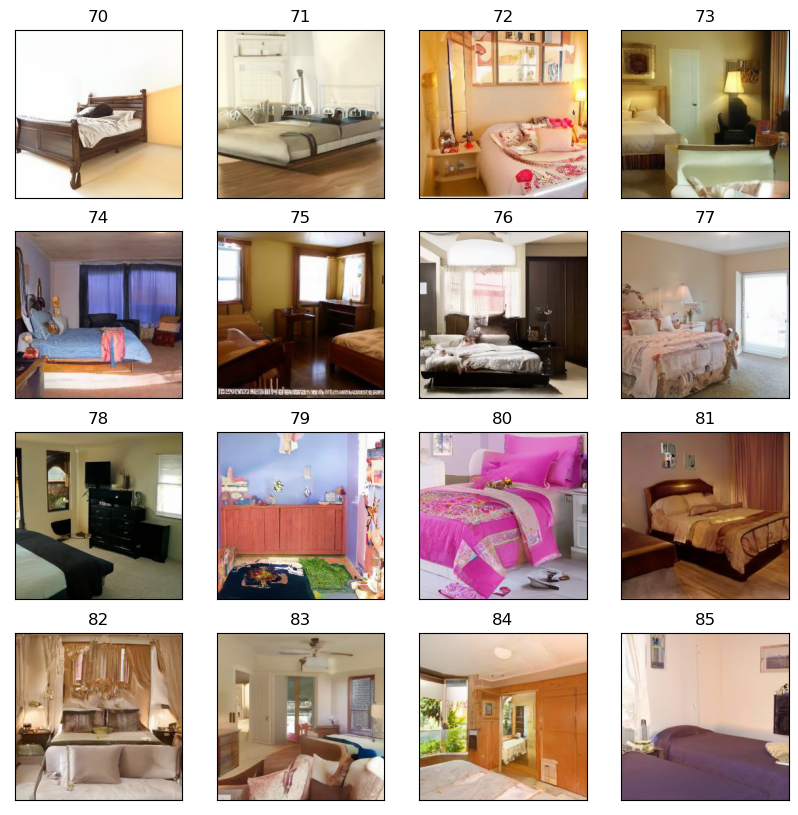

In [28]:
start=70
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(batches[i+start,:,:,])
    plt.xticks([])
    plt.yticks([])
    plt.title(i+start)
#plt.savefig(fname="img/T1CE_second_4")
plt.show()

## Experiment 3
- exactly same setup as LSUN bedroom model regarding training params
- batch size 128 with minibatch 7 

So 7 images per minibatch, 128/7=18.3 minibatches per full batch. Meaning **128 images per (gradient-)step.**

Saving before: 10,000 steps x 7 per step = 70,000 pics (~3 epochs).
Saving now:    10,000 steps x 128  step  = 1,280,000 pics (~54 epochs so 18*10K equals 180K steps before).

In the OG paper for LSUN bedroom they used 64 x 2,400,000 steps = 153.6M pics based on 50K trainpics **(=153.6M/50K=3000 epochs)**. In the follow up one the trained as follows: 256 x 500,000 steps = 128M pics. 

The code that is used here, that was specifically used to train the unconditional LSUN bedroom model used batch 128 on 1,2M steps. Total: 128x1200000=153.6M pics=3072 epochs)

The distribution of our data is a lot less complex/diverse so less steps/epochs should be necessary to sufficiently learn the distribution. We have **23,478** pics in our dataset. To reach the same amount of epochs we would need to take (23478x3072)/128 = 563.5K steps. Let's see how far we get. One full epoch after 184 steps. 

Training times: 
- Experiment 2: 13:58 to 15:51 = 2hrs (~113 min) for 7x10,000=70,000 pics, so (113x60)x100/70000=9.68s/100pics
- Experiment 3: with microbatching 114s for 10*128 so 8.9s/100pics even faster? Precise: 25.12. 20:11 to 27.12. 03:51 24,7,40min=31h40min, 1900 so 8.91 secs per 100 pics


Other insights:
The losses return an N dimensional tensor of losses (N is the number of imgs in a batch). The "loss" key stores the mean loss for these N imgs. It also computes the 4 quartiles of these losses. Q1 means (I guess) that 75% of the data are smaller than this value. 

#### Training progress

In [6]:
(1900*60)*100/1280000

8.90625

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Next training use log 1
exp_3_first = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_3/progress_old_10k.csv")
exp_3_sec = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_3/progress_old_20k.csv")
exp_3_third = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_3/progress_old_30k.csv")
exp_3_fourth = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_3/progress.csv")
exp_3 = pd.concat([exp_3_first, exp_3_sec, exp_3_third, exp_3_fourth]).reset_index()

exp_2_first = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_2/progress_old_60k.csv")
exp_2_sec = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_2/progress_old_110k.csv")
exp_2_third = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_2/progress_old_170k.csv")
exp_2_fourth = pd.read_csv("../Checkpoints/Checkpoint_TwoChan_Exp_2/progress.csv")
exp_2 = pd.concat([exp_2_first, exp_2_sec, exp_2_third, exp_2_fourth]).reset_index()

In [2]:
import numpy as np

# Normalize each point to num of seen pics
def get_loss_with_num_pics(loss_array, batch_size, save_interval=10):
    n_steps = len(loss_array)
    steps = np.arange(1,n_steps+1,1)*save_interval
    seen_pics = steps * batch_size
    return seen_pics, loss_array

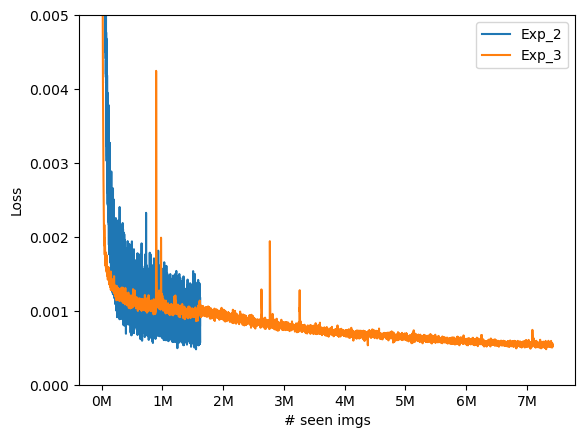

In [3]:
import matplotlib.ticker as ticker

start_from = 00000
to_plot_2 = exp_2.loss_q1
to_plot_3 = exp_3.loss_q1
seen_pics_2, loss_2 = get_loss_with_num_pics(to_plot_2, batch_size=7)
seen_pics_3, loss_3 = get_loss_with_num_pics(to_plot_3, batch_size=128)

seen_pics_2_fin, loss_2_fin = seen_pics_2[seen_pics_2>start_from], loss_2[seen_pics_2>start_from]
seen_pics_3_fin, loss_3_fin = seen_pics_3[seen_pics_3>start_from], loss_3[seen_pics_3>start_from]

end_at = min(seen_pics_3.max(), seen_pics_2.max())

plt.figure()
plt.plot(seen_pics_2_fin, loss_2_fin, label="Exp_2")
plt.plot(seen_pics_3_fin, loss_3_fin, label="Exp_3")
plt.xlabel("# seen imgs")
plt.ylabel("Loss")
#plt.xlim((start_from, end_at))
plt.ylim((0,0.005))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000000) + 'M'))
plt.legend()
plt.show()

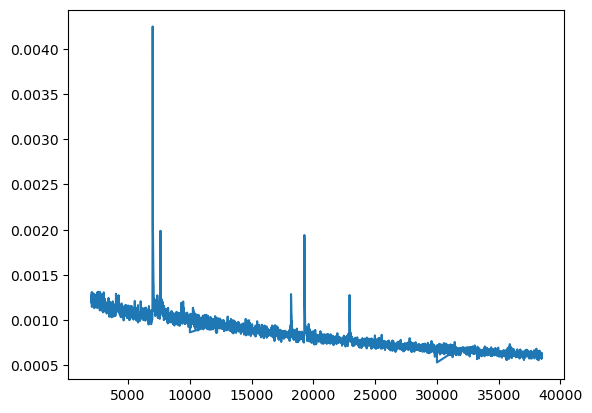

In [8]:
plt.plot(exp_3.step[200:],exp_3.loss_q1[200:])

In [29]:
# Visualize Experiment 3
import numpy as np
import matplotlib.pyplot as plt

step = "050000"

data = np.load(f'../Samples/TwoChan_Exp_3/ema_0.9999_{step}/samples_420x256x256x2.npz')
#data = np.load(f'../Samples/TwoChan_Exp_3/model{step}/samples_420x256x256x2.npz')

batches = data[data.files[0]]

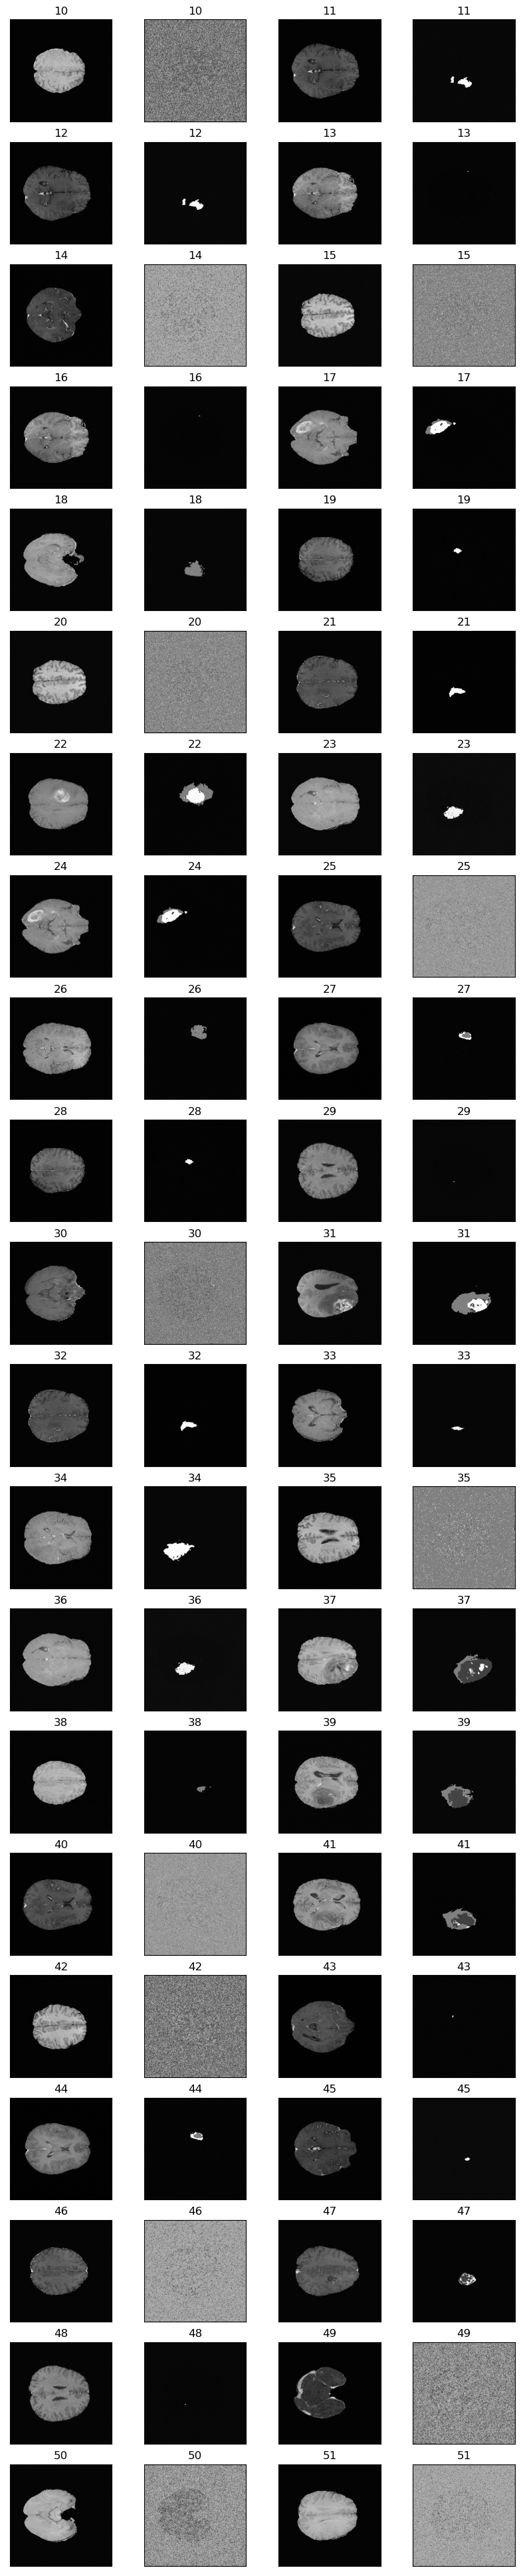

In [31]:
start=10
plt.figure(figsize=(10,100))
for i in range(21):
    plt.subplot(42,4,i*4+1)
    plt.imshow(batches[i+start,:,:,1], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(i*2+start)
    plt.subplot(42,4,i*4+2)
    plt.imshow(batches[i+start,:,:,0], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(i*2+start)
    plt.subplot(42,4,i*4+3)
    plt.imshow(batches[i*2+start+1,:,:,1], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(i*2+start+1)
    plt.subplot(42,4,i*4+4)
    plt.imshow(batches[i*2+start+1,:,:,0], cmap="gray")
    plt.xticks([])
    plt.yticks([])
    plt.title(i*2+start+1)
#plt.subplots_adjust(wspace=0, hspace=0)
#plt.tight_layout()
# plt.savefig(fname="img/T1CE_Exp2_model_20k", dpi=plt.gcf().dpi, bbox_inches='tight')
plt.show()

In [20]:
import time
now = time.time()

p=0
for i in range(100000000):
    p+=1
print(time.time()-now)

4.360133409500122


In [24]:
# 2824.92 s per 420
2825/420

6.726190476190476